<a href="https://colab.research.google.com/github/DaniChinwendu/EWC_ANN-MODEL/blob/main/EWC_1_DPRA%2Ch_CLAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
from google.colab import files
uploaded=files.upload()
import pandas as pd

Saving Hirota_2015_Updated_Clean_092515 (2).csv to Hirota_2015_Updated_Clean_092515 (2).csv


In [2]:
df=pd.read_csv(io.BytesIO(uploaded['Hirota_2015_Updated_Clean_092515 (2).csv']))
df["CASRN"] = df["CASRN"].astype(str)
df.index = df["CASRN"]
df.head()

,CASRN,Chemical,LLNAthreshold,logLLNAthreshold,logMinhCLAT,logDPRA,logImax,logMAC,EC3,LLNA_Threshold,GHS_Category,hCLAT_Call,DPRA_Call,ARE_Call,SH_Call,Pred_LLNAthreshold,Pred_PotencyCategory,LLNA_Category
CASRN,,,,,,,,,,,,,,,,,,
886-38-4,886-38-4,Diphenylcyclopropenone,0.003,-2.5229,0.593,1.7118,1.2281,2.666,0.003,0.003,1A,P,P,P,P,0.35,Extreme or Strong,Extreme
15646-46-5,15646-46-5,Oxazolone,0.003,-2.5229,0.433,1.6390,0.2086,1.765,0.003,0.003,1A,P,P,P,P,0.20,Extreme or Strong,Extreme
1897-45-6,1897-45-6,Chlorothalonil,0.004,-2.3979,-0.678,1.7071,1.2956,1.702,0.004,0.004,1A,P,P,P,P,0.02,Extreme or Strong,Extreme
mixture,mixture,MCI/MI,0.005,-2.3010,0.344,1.7292,0.4691,1.794,0.005,0.005,1A,P,P,P,P,0.13,Extreme or Strong,Extreme
106-51-4,106-51-4,"1,4-Benzoquinone",0.01,-2.0044,0.350,1.9680,1.7092,1.614,0.01,0.01,1A,P,P,P,P,0.13,Extreme or Strong,Extreme


In [3]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import re
import sklearn
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold,RepeatedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict,validation_curve
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from yellowbrick.features import Rank1D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings # supress warnings
warnings.filterwarnings('ignore')



In [4]:
df1=df.dropna(subset=[ 'logDPRA','logMinhCLAT'])
df1.head()


,CASRN,Chemical,LLNAthreshold,logLLNAthreshold,logMinhCLAT,logDPRA,logImax,logMAC,EC3,LLNA_Threshold,GHS_Category,hCLAT_Call,DPRA_Call,ARE_Call,SH_Call,Pred_LLNAthreshold,Pred_PotencyCategory,LLNA_Category
CASRN,,,,,,,,,,,,,,,,,,
886-38-4,886-38-4,Diphenylcyclopropenone,0.003,-2.5229,0.593,1.7118,1.2281,2.666,0.003,0.003,1A,P,P,P,P,0.35,Extreme or Strong,Extreme
15646-46-5,15646-46-5,Oxazolone,0.003,-2.5229,0.433,1.6390,0.2086,1.765,0.003,0.003,1A,P,P,P,P,0.20,Extreme or Strong,Extreme
1897-45-6,1897-45-6,Chlorothalonil,0.004,-2.3979,-0.678,1.7071,1.2956,1.702,0.004,0.004,1A,P,P,P,P,0.02,Extreme or Strong,Extreme
mixture,mixture,MCI/MI,0.005,-2.3010,0.344,1.7292,0.4691,1.794,0.005,0.005,1A,P,P,P,P,0.13,Extreme or Strong,Extreme
106-51-4,106-51-4,"1,4-Benzoquinone",0.01,-2.0044,0.350,1.9680,1.7092,1.614,0.01,0.01,1A,P,P,P,P,0.13,Extreme or Strong,Extreme


In [5]:
train_data=df1[['logLLNAthreshold', 'logDPRA','logMinhCLAT']]
train_data=train_data.reset_index()
train_data

,CASRN,logLLNAthreshold,logDPRA,logMinhCLAT
0,886-38-4,-2.5229,1.7118,0.5930
1,15646-46-5,-2.5229,1.6390,0.4330
2,1897-45-6,-2.3979,1.7071,-0.6780
3,mixture,-2.3010,1.7292,0.3440
4,106-51-4,-2.0044,1.9680,0.3500
...,...,...,...,...
134,3810-74-0,1.6990,-2.0000,3.0000
135,63-74-1,1.6990,-0.1549,3.0000
136,121-57-3,1.3979,0.4624,3.6990
137,121-33-5,1.6990,1.5099,2.8129


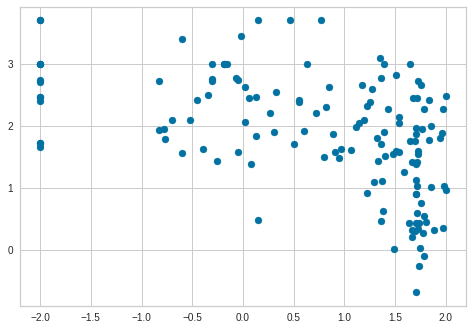

In [6]:
plt.scatter(train_data['logDPRA'], train_data['logMinhCLAT'])

In [ ]:
train_data.to_csv('MAIN HIROTA FILE3.csv',index=True)

In [7]:
#Read Cosmetic Europe in vitro data, physchem properties, OECD Toolbox predictions
uploaded=files.upload()
df2=pd.read_csv(io.BytesIO(uploaded['CosEu_invitro_insilico_128chems_Jan2017.csv']))
df2["CASRN"] = df2["CASRN"].str.strip()
df2 = df2.sort_values(by="Num")
df2=df2

Saving CosEu_invitro_insilico_128chems_Jan2017.csv to CosEu_invitro_insilico_128chems_Jan2017.csv


In [8]:
# Replace negative values in DPRA.mean column with 0
df2["DPRA.mean"].mask(df2["DPRA.mean"] < 0, 0, inplace=True)
# Remove rows with missing values in DPRA.Call or hCLAT.Call columns
df2 = df2.dropna(subset=["DPRA.Call", "hCLAT.Call"])
#df2['DPRA.mean']=df2['DPRA.mean'].clip(lower=0)
#df2.dropna(subset=['DPRA.Call','hCLAT.Call'],inplace=True)


In [9]:
#Read in vivo LLNA and human data
uploaded=files.upload()
df3=pd.read_csv(io.BytesIO(uploaded['CosEu_invivo_128chems_March2017.csv']))


Saving CosEu_invivo_128chems_March2017.csv to CosEu_invivo_128chems_March2017.csv


In [10]:

# select the rows where LLNA.Call.MNC is equal to 0
mask = df3["LLNA.Call.MNC"] == 0
# assign 100 to the selected rows in the Median_NC.EC3 column
df3.loc[mask, "Median_NC.EC3"] = 100


In [11]:
# remove the period (.) character from the column names and
# replace multiple consecutive periods with underscores
df3.columns = [col.replace(".", "").replace("(\\.)+", "_") for col in df3.columns]
# Check if all values in cosEu['Num'] are contained in cosEu['Num']
#if all(df3["Num"].isin(df2["Num"])):
# Merge the two data frames on the Num column
CosEu= pd.merge(df2,df3, on="Num", sort=False)
# Replace instances of "CASRN.x" in column names with "CASRN"
CosEu.columns = CosEu.columns.str.replace("CASRN.x", "CASRN")
CosEu.columns = CosEu.columns.str.replace("Median_NCEC3_x", "Median_NCEC3")

# Set the row names to the values in the CASRN column
CosEu.index = CosEu["CASRN"]
CosEu["logLLNAthreshold"]=df1["logLLNAthreshold"]

# Create a new column and store the logarithm (base 10) of the values in the Median_NC_EC3 column
CosEu['log_Median_NC_EC3'] = np.log10(CosEu["Median_NCEC3"])

# Replace missing values in log_Median_NC_EC3 with corresponding values in logLLNAthreshold
CosEu["log_Median_NC_EC3"].mask(
    CosEu['log_Median_NC_EC3'].isna(),
    CosEu["logLLNAthreshold"],
    inplace=True)
len(CosEu)

127

In [12]:
#Applying logic to deal with negatives (If all model inputs are negative, prediction is negative)
CosEu['MODEL_PRED1']='Pos'
col_list=["DPRA.Call","hCLAT.Call"]
CosEu['Pos.Call.DH']=CosEu[col_list].sum(axis=1)
CosEu['Model_pred']=CosEu['Pos.Call.DH'].apply(lambda x:'Neg' if x==0 else 'Pos')

In [13]:
#Replace negatives in hCLAT with CV75
CosEu['hCLAT.MIT']=np.where(CosEu['hCLAT.MIT']=='inf',CosEu['hCLAT.MIT'],CosEu['h.CLAT.CV75'])
#Convert all h_CLAT Value to log 10 values
CosEu['log_hCLAT_MIT']=np.log10(CosEu['hCLAT.MIT'])
CosEu['log_hCLAT_MIT'].replace('inf','NA',inplace=True)



In [14]:
#Replace 0 in DPRA with 0.01
CosEu["DPRA.mean"].mask(CosEu["DPRA.mean"] == 0, 0.01, inplace=True)
#CosEu['DPRA.mean']=CosEu['DPRA.mean'].clip(lower=0.01)
CosEu['log_DPRA_mean']=np.log10(CosEu['DPRA.mean'])
CosEu.head()


,Num,Chemical_x,CASRN,U-SENS.Call,U-SENS.CD86.EC150,U-SENS.CV70,DPRA.Call,DPRA.percCysdep,DPRA.percLysdep,DPRA.mean,...,humanCall,humanpotency3class,humanpotency5class,logLLNAthreshold,log_Median_NC_EC3,MODEL_PRED1,Pos.Call.DH,Model_pred,log_hCLAT_MIT,log_DPRA_mean
CASRN,,,,,,,,,,,,,,,,,,,,,
35691-65-7,2,Methyldibromo glutaronitrile,35691-65-7,1.0,3,5,1.0,100.0,28.6,64.30,...,1,Strong,Strong,-0.0458,-0.045757,Pos,2.0,Pos,0.995635,1.808211
149-30-4,3,2-Mercaptobenzothiazole,149-30-4,1.0,40,80,1.0,97.5,0.0,48.75,...,1,Weak,Moderate,0.2304,0.414973,Pos,2.0,Pos,2.227887,1.687975
104-55-2,4,Cinnamic aldehyde,104-55-2,1.0,1,8,1.0,70.6,43.3,56.95,...,1,Strong,Strong,0.4771,0.060698,Pos,2.0,Pos,1.447158,1.755494
137-26-8,5,Tetramethylthiuramdisulfide,137-26-8,1.0,0.1,3,1.0,99.5,6.9,53.20,...,1,Weak,Moderate,0.7160,0.466868,Pos,2.0,Pos,1.000000,1.725912
69-72-7,6,Salicylic acid,69-72-7,0.0,>200,>200,1.0,3.5,21.1,12.30,...,0,Non,Non,NaN,1.086360,Pos,2.0,Pos,3.000000,1.089905


In [15]:
#Checking for intesection between hirotashi dataset and merged invivo, invitro dataset using the CAS column
#strip x suffix and prefix
CosEu.columns = CosEu.columns.str.rstrip('_x')
merge = pd.merge(df1,CosEu, left_index=True, right_index=True,how='right')
ex_data=merge[['log_Median_NC_EC3','log_DPRA_mean','log_hCLAT_MIT','Model_pred']]
#merge[['logLLNAthreshold', 'logDPRA','logMinhCLAT']]
#merge[['log_Median_NC_EC3','log_DPRA_mean','log_hCLAT_MIT','Model_pred']]
ex_data['log_hCLAT_MIT'].replace('inf','NA',inplace=True)
ex_data= ex_data.replace('inf', np.NaN)
ex_data.dropna(subset=['log_hCLAT_MIT','log_DPRA_mean'], inplace=True)
ex_data.head(98)
len(ex_data)

#CosEu_1.dropna(subset=['log_DPRA_mean','log_hCLAT_MIT'],inplace=Tr
#3len(n_53)
#3n_53.head(30),df1, CosEu,

127

In [16]:
merge.columns=merge.columns.str.rstrip('_x')

In [ ]:
print(merge.columns)

Index(['CASRN', 'Chemical', 'LLNAthreshold', 'logLLNAthreshold', 'logMinhCLAT',
       'logDPRA', 'logIma', 'logMAC', 'EC3', 'LLNA_Threshold', 'GHS_Category',
       'hCLAT_Call', 'DPRA_Call', 'ARE_Call', 'SH_Call', 'Pred_LLNAthreshold',
       'Pred_PotencyCategory', 'LLNA_Category', 'Num', 'Chemical_y', 'CASRN_y',
       'U-SENS.Call', 'U-SENS.CD86.EC150', 'U-SENS.CV70', 'DPRA.Call',
       'DPRA.percCysdep', 'DPRA.percLysdep', 'DPRA.mean', 'DPRA.potency',
       'hCLAT.Call', 'hCLAT.CD86.EC150', 'hCLAT.CD54.EC200', 'h.CLAT.CV75',
       'hCLAT.MIT', 'KS.Call', 'KS.EC1.5', 'KS.EC3', 'KS.IC50', 'KS.Ima',
       'DEREK.Skin.Sensitisation', 'DEREK.Training.set', 'OECD', 'LogP',
       'LogP.Source', 'LogS', 'LogS.Source', 'BP', 'BP.Source', 'MP',
       'MP.Source', 'LogVP', 'LogVP.Source', 'LogBCF', 'LogBCF.Source', 'MW',
       'Chemical_y', 'CASRN_y', 'ArithMeanEC3', 'GeoMeanEC3', 'MedianEC3',
       'Median_NCEC3', 'MinEC3', 'LLNApotencyMNC', 'LLNApotency3classMNC',
       'LLNACall

In [17]:
ex_data
ex_data=ex_data.reset_index()

In [18]:
ex_data

,CASRN,log_Median_NC_EC3,log_DPRA_mean,log_hCLAT_MIT,Model_pred
0,35691-65-7,-0.045757,1.808211,0.995635,Pos
1,149-30-4,0.414973,1.687975,2.227887,Pos
2,104-55-2,0.060698,1.755494,1.447158,Pos
3,137-26-8,0.466868,1.725912,1.000000,Pos
4,69-72-7,1.086360,1.089905,3.000000,Pos
...,...,...,...,...,...
122,101-39-3,0.653213,1.292256,2.143015,Pos
123,111-80-8,0.397940,1.712650,2.282622,Pos
124,93-51-6,0.748188,0.759668,2.447158,Pos
125,122-78-1,0.672098,1.619771,1.431364,Pos


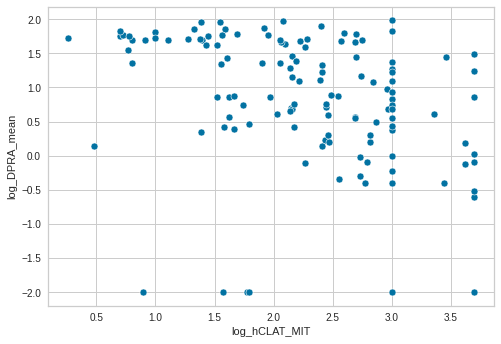

In [19]:
sns.scatterplot(x=ex_data['log_hCLAT_MIT'], y=ex_data['log_DPRA_mean'], data=ex_data)

In [ ]:
ex_data.to_csv('Hirota_in_COSEU.csv',index=True)

In [20]:
CosEu1=ex_data[ex_data['Model_pred']!='Neg']
CosEu1.dropna()
len(CosEu)
CosEu1['log_Median_NC_EC3'].isna().sum()
CosEu1[['log_DPRA_mean','log_hCLAT_MIT']].isna().sum()
#index_to_drop=['1154-59-2','886-38-4','97-00-7','94-36-0','111-30-8']#drop top five residual chemicals
#CosEu1.drop(index_to_drop,inplace=True)
#df = df.drop(df.index[[0, 2]])

log_DPRA_mean    0
log_hCLAT_MIT    0
dtype: int64

In [21]:
CosEu1 [['log_DPRA_mean','log_hCLAT_MIT']]
CosEu1

,CASRN,log_Median_NC_EC3,log_DPRA_mean,log_hCLAT_MIT,Model_pred
0,35691-65-7,-0.045757,1.808211,0.995635,Pos
1,149-30-4,0.414973,1.687975,2.227887,Pos
2,104-55-2,0.060698,1.755494,1.447158,Pos
3,137-26-8,0.466868,1.725912,1.000000,Pos
4,69-72-7,1.086360,1.089905,3.000000,Pos
...,...,...,...,...,...
122,101-39-3,0.653213,1.292256,2.143015,Pos
123,111-80-8,0.397940,1.712650,2.282622,Pos
124,93-51-6,0.748188,0.759668,2.447158,Pos
125,122-78-1,0.672098,1.619771,1.431364,Pos


In [22]:
#Defining target and predictors for first set of data
TargetVariable=['logLLNAthreshold']
Predictors=['logDPRA','logMinhCLAT']
X=df1[Predictors]
y=df1[TargetVariable]
#All data were scaled before splitting 
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()
#Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
# Generating the standardized values of X and y
scaled_X=PredictorScalerFit.transform(X)
scaled_y=TargetVarScalerFit.transform(y)
scaled_y.shape

(139, 1)

In [23]:
TargetVariable=['log_Median_NC_EC3']
Predictors=['log_DPRA_mean','log_hCLAT_MIT']
X=CosEu1[Predictors]
y=CosEu1[TargetVariable]
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
# Generating the standardized values of X and y
ex_x=PredictorScalerFit.transform(X)
ex_y=TargetVarScalerFit.transform(y)
ex_y.shape
#ALL EXTERNAL  DATA WERE SCALED USING MIN-MAX SCALA
#TESTING WITH EXTERNAL DATASET



(107, 1)

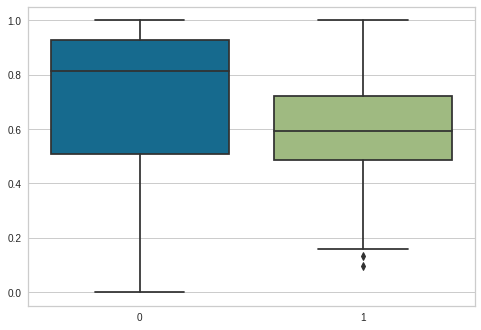

In [29]:
import seaborn as sns
sns.boxplot(data=X_train)

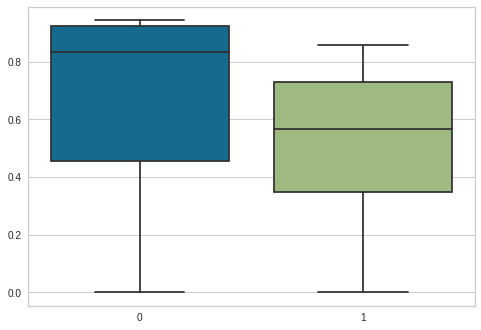

In [28]:
import seaborn as sns
sns.boxplot(data=X_test)

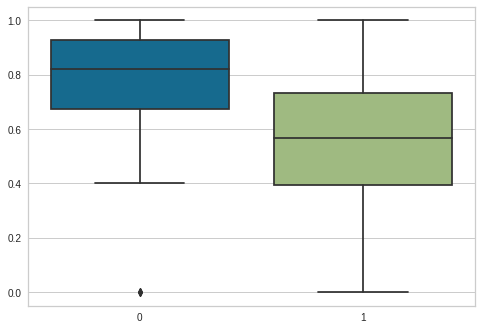

In [ ]:
import seaborn as sns
sns.boxplot(data=ex_x)

In [25]:
#Adding polynomial features(CHOATIC)
#poly=PolynomialFeatures(degree=6, include_bias=False)
#poly_features = poly.fit_transform(scaled_X)
#X_train, X_test, y_train, y_test = train_test_split(poly_features, scaled_y, test_size=0.2, random_state=0)

In [30]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=0)



In [31]:
#Checking shape of the trainset and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#different activation function['identity', 'logistic', 'relu', 'softmax', 'tanh']

(111, 2)
(111, 1)
(28, 2)
(28, 1)


In [32]:
model = MLPRegressor(hidden_layer_sizes=(5,2),
                     activation='logistic',
                     random_state=42,
                     learning_rate_init=0.02,
                     momentum=0.7,
                     max_iter=500,
                     solver='lbfgs'
                    )



# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model.predict(X_test)
train_score=model.score(X_train, y_train)
test_score=model.score(X_test, y_test)
print('train-score',train_score)
print('test_score',test_score)

train-score 0.5422564944562156
test_score 0.6899936967243685


In [33]:
y_pred=model.predict(X_test)
print('The Score with ',(r2_score(y_pred, y_test)))
print('the mean squared error',(mean_squared_error(y_pred, y_test)))

The Score with  0.5278064252437888
the mean squared error 0.018872832998162864


RESERVED CODE

In [ ]:
# Get the weights of the model
weights = [model.coefs_,model.intercepts_]

# Perturb the weights by a random amount within the range (-5, 5)
perturbed_weights = []
for i in range(len(weights)):
    layer_weights = []
    for j in range(len(weights[i])):
        layer_weights.append(weights[i][j]+np.random.uniform(low=-5, high=5, size=weights[i][j].shape))
    perturbed_weights.append(layer_weights)
model.coefs_ = perturbed_weights[0]
model.intercepts_ = perturbed_weights[1]

In [ ]:
#Checking weights
print(model.coefs_)

In [ ]:
#Checking for bias
print(model.intercepts_)

In [ ]:
W=model.coefs_
b=model.intercepts_

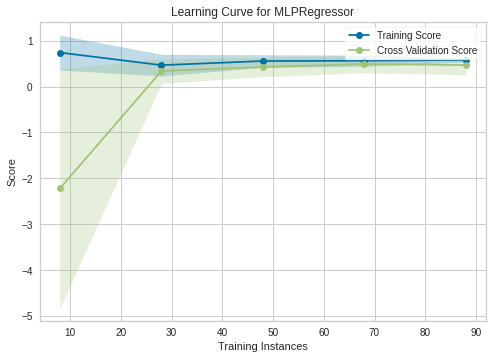

In [34]:
import yellowbrick
from yellowbrick.model_selection import LearningCurve
cv = KFold(n_splits=5, random_state=13, shuffle=True)#
# Create the learning curve visualizer
visualizer = LearningCurve(model, cv=cv,scoring='r2')

# Fit the visualizer and display the learning curve
visualizer.fit(X_train, y_train)
visualizer.show()

5 FOLD CROSS VALIDATION TRAIN SET

In [35]:
#implementing the 5 fold cross validation for r2 score on train set#28
cv = KFold(n_splits=5,random_state=28,shuffle=True)
scores = cross_val_score(model,X_train, y_train,scoring='r2', cv=cv)
scores.mean()

0.4582711784194693

In [36]:
#implementing the 5 fold cross validation for MSE & RMSE on train set

#scoring=['cv = KFold(n_splits=5, random_state=0, shuffle=True)eg_mean_squared_error']
scores = cross_val_score(model,X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(mean(absolute(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)


the root mean squared erro 0.16169312029249333
the mean squared error 0.026144665149922718


In [37]:
#model performance for predicted outcomes after 5-fold cross validation#12
cv = KFold(n_splits=5, random_state=12, shuffle=True)
pred = cross_val_predict(model, X_train, y_train, cv=cv)

R2 = metrics.r2_score(y_train,pred)
MSE=metrics.mean_squared_error(y_train, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV 0.4705260039613144
MSE AFTER CV: 0.02659874945281078
RMSE AFTER CV: 0.16309123045955223


5 FOLD CROSS VALIDATION TEST SET

In [38]:
#implementing the 5 fold cross validation for r2 score on train set#24
cv = KFold(n_splits=5, random_state=24, shuffle=True)
#scoring=['neg_mean_squared_error']
scores = cross_val_score(model, X_test,y_test, scoring='r2', cv=cv)
scores.mean()

0.3834190985738406

In [39]:
#implementing the 5 fold cross validation for MSE & RMSE on test set
cv = KFold(n_splits=5, random_state=28, shuffle=True)#28
#scoring=['neg_mean_squared_error']
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(mean(absolute(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.13219942920906372
the mean squared error 0.01747668908320225


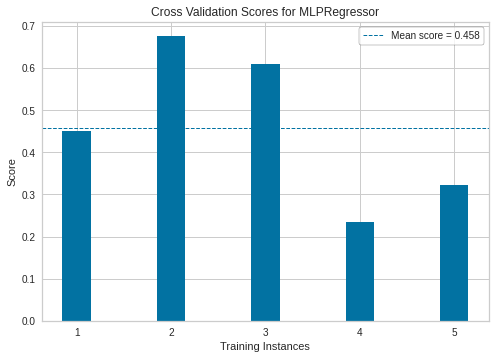

CVScores(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cd88e0d0>,
         cv=KFold(n_splits=5, random_state=28, shuffle=True),
         estimator=MLPRegressor(activation='logistic',
                                hidden_layer_sizes=(5, 2),
                                learning_rate_init=0.02, max_iter=500,
                                momentum=0.7, random_state=42, solver='lbfgs'),
         scoring='r2')

In [40]:
##28
from yellowbrick.model_selection import cv_scores
cv_scores(
    model,
    X_train,
    y_train,
    cv=cv,
    n_jobs=-1,
    scoring='r2',
    random_state=28)

In [41]:
#model performance for predicted outcomes after 5-fold cross validation
cv = KFold(n_splits=5, random_state=0, shuffle=True)#2
pred = cross_val_predict(model, X_test, y_test, cv=cv)

R2 = metrics.r2_score(y_test, pred)
MSE=metrics.mean_squared_error(y_test, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV 0.06067806917795859
MSE AFTER CV: 0.05718485638711137
RMSE AFTER CV: 0.2391335534531099


TEN FOLD CROSS VALIDATION TRAIN SET

In [42]:
#implementing the 10 fold cross validation for r2 score on  train set#13
cv = KFold(n_splits=10, random_state=13, shuffle=True)#13
#scoring=['neg_mean_squared_error']
scores = cross_val_score(model, X_train,y_train, scoring='r2', cv=cv)
scores.mean()

0.44089618897308486

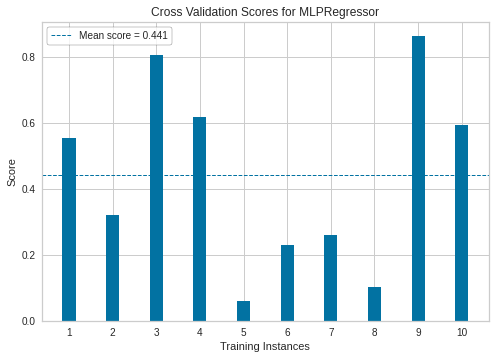

CVScores(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cb00e730>,
         cv=KFold(n_splits=10, random_state=13, shuffle=True),
         estimator=MLPRegressor(activation='logistic',
                                hidden_layer_sizes=(5, 2),
                                learning_rate_init=0.02, max_iter=500,
                                momentum=0.7, random_state=42, solver='lbfgs'),
         scoring='r2')

In [43]:
# validation score for cv=10
cv = KFold(n_splits=10, random_state=13, shuffle=True)#13
cv_scores(
    model,
    X_train,
    y_train,
    cv=cv,
    n_jobs=-1,
    scoring='r2',
    random_state=13)

In [44]:
#implementing the 10 fold cross validation for RMSE & MSE on train set
cv = KFold(n_splits=10, random_state=42, shuffle=True)
#scoring=['neg_mean_squared_error']
pred_cv1 = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
RMSE=sqrt(mean(absolute(pred_cv1)))
MSE=(absolute(mean(pred_cv1)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.1608572916870331
the mean squared error 0.02587506828888725


In [45]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)#5
pred = cross_val_predict(model, X_train, y_train, cv=cv)

R2 = metrics.r2_score(y_train, pred)
MSE=metrics.mean_squared_error(y_train, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)


r2 after CV 0.4715419003186946
MSE AFTER CV: 0.026547714703451717
RMSE AFTER CV: 0.1629346945971045


10 FOLD CROSS VALIDATION TEST SET

In [46]:
#implementing the 10 fold cross validation for r2 score on  test set#8
cv = KFold(n_splits=10, random_state=8, shuffle=True)#8
#scoring=['neg_mean_squared_error']
scores = cross_val_score(model, X_test,y_test, scoring='r2', cv=cv)
scores.mean()

0.3875480742745022

In [47]:
#implementing the 10 fold cross validation for RMSE & MSE score the model for test set
cv = KFold(n_splits=10, random_state=8, shuffle=True)#8
#scoring=['neg_mean_squared_error']
scores = cross_val_score(model, X_test,y_test, scoring='neg_mean_squared_error', cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(absolute(mean(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.14268400937858497
the mean squared error 0.02035872653234812


In [48]:
pred = cross_val_predict(model, X_test, y_test, cv=cv)

R2 = metrics.r2_score(y_test, pred)
MSE=metrics.mean_squared_error(y_test, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV 0.6669038670222189
MSE AFTER CV: 0.020278515706289087
RMSE AFTER CV: 0.14240265343837202


LEAVE OUT ONE CROSS VALIDATION TRAIN SET

In [49]:
#EVALUATING THE MODEL WITH LEAVE ONE OUT On train set
cv=LeaveOneOut()

scores = cross_val_score(model,X_train, y_train, scoring='neg_mean_squared_error',
                         cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(absolute(mean(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.16394958661632358
the mean squared error 0.026879466951663385


In [50]:
cv=LeaveOneOut()
pred = cross_val_predict(model, X_train, y_train, cv=cv)
R2 = metrics.r2_score(y_train, pred)
MSE=metrics.mean_squared_error(y_train, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV 0.464938048928347
MSE AFTER CV: 0.026879466951663385
RMSE AFTER CV: 0.16394958661632358


LEAVE OUT ONE CROSS VALIDATION TEST SET

In [51]:
#EVALUATING THE MODEL WITH LEAVE ONE OUT On test set
cv=LeaveOneOut()

scores = cross_val_score(model,X_test, y_test, scoring='neg_mean_squared_error',
                         cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(absolute(mean(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.13657783241408955
the mean squared error 0.01865350430693113


In [52]:
cv=LeaveOneOut()
pred = cross_val_predict(model, X_test, y_test, cv=cv)
R2 = metrics.r2_score(y_test, pred)
MSE=metrics.mean_squared_error(y_test, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)


r2 after CV 0.6935964031531093
MSE AFTER CV: 0.01865350430693113
RMSE AFTER CV: 0.13657783241408955


In [ ]:
sklearn.metrics.SCORERS.keys()

In [53]:
cv=LeaveOneOut()
y_pred = cross_val_predict(model, X_test, y_test, cv=cv)
r2_loocv= r2_score(y_pred,y_test)
print(r2_loocv)

0.6445558302224976


GRID SEARCH CV USING RF MODEL WITH ALL 2 FEATURES TO ACCESS CV TEST AND TRAIN SCORE K=10

In [ ]:
#performing hyperperemeter tuning with grid sreach cross validation with REF using feature selection of 2 feature: this allowed to see the training and test score on the training s
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select':list(range(1, len(X_train.columns)+1)) }]
model_G = MLPRegressor(hidden_layer_sizes=(5,2),activation="logistic" ,random_state=1, learning_rate_init=0.02,momentum=0.7, max_iter=500,solver='lbfgs')
lm = model_G
lm.fit(X_train, y_train)
rfe = RFE(lm) 

#rfe.support_  
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid= hyper_params,
                        scoring= 'r2',
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 


model_cv.fit(X_train,y_train)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


GRID SERACH CV FOR SELECTING BEST OPTIMIZER AND ACTIVATION FUNCTIONS

In [ ]:
cv=KFold(n_splits=5,shuffle=True,random_state=0)

In [ ]:
#performing Gridsearch for TESTING DIFFERENT OPTIMIZER
# define the grid search parameters
model=model
param = {
    'solver':['adam','sgd','lbfgs']}
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
#neg_mean_absolute_error

Best Score: 0.4939876211561847
Best Hyperparameters: {'solver': 'lbfgs'}


In [ ]:
#Grid search for the best activation function
model=model
param = {
    'activation':['relu','tahn','identity','softmax','logistic']}
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.4939876211561847
Best Hyperparameters: {'activation': 'logistic'}


BUILDING THE FINAL MODEL


:CORRELATION METRICS FOR TEST AND PREDICTED OUTCOME USING CROSS TAB

In [ ]:
# Create a dataframe with ypred and ytest as columns
df = pd.DataFrame({'ypred': y_pred, 'ytest': y_test})

# Calculate the cross-tabulation of ypred and ytest
ct = pd.crosstab(df['ypred'], df['ytest'])

# Calculate the correlation coefficient
corr = ct.corr().iloc[0,1]

# Calculate the covariance
cov = ct.cov().iloc[0,1]

#print(f'Correlation coefficient: {corr}')
#print(f'Covariance: {cov}')

ValueError: ignored

In [ ]:
#PEARSON CORRELATION FOR TEST and PREDICTED OUTCOME for X_test
corr_1=np.corrcoef(y_test, y_pred)
corr_1

In [ ]:
#COVARIANCE FOR TEST and PREDICTED OUTCOME for X_test
Cov=np.cov(y_test, y_pred)
Cov

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('true values')
plt.ylabel('predictions')

PREDICTING WITH THE EXTERNAL DATASET

In [54]:
#TESTING WITH EXTERNAL DATASET
pred=model.predict(ex_x)
r2 = sklearn.metrics.r2_score(ex_y, pred)
MSE=sklearn.metrics.mean_squared_error(ex_y, pred)
print(r2)
print(MSE)
RMSE=sqrt(MSE)
print(RMSE)
len(pred)


0.4809265463817992
0.03861679990087143
0.19651157701487063


107

Text(0, 0.5, 'predictions')

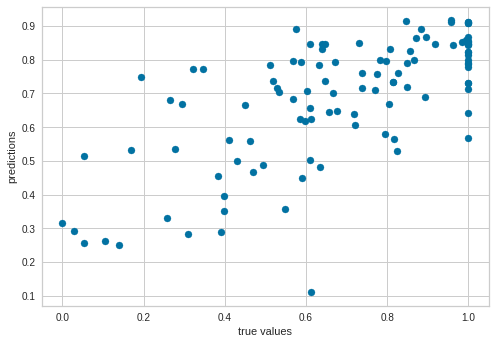

In [55]:
plt.scatter(ex_y, pred)
plt.xlabel('true values')
plt.ylabel('predictions')


CORRELATION METRICS for EXTERNAL DATA SET

In [56]:
print(ex_x.shape)
print(ex_y.shape)


(107, 2)
(107, 1)


In [57]:
ex_y.shape=(107,) #cHANGE SHAPE AND DIMENSION

In [58]:
#COVARIANCE DATASET
Cov=np.cov(ex_y, pred )
Cov

array([[0.07509748, 0.03519967],
       [0.03519967, 0.0342677 ]])

In [59]:
#PEARSON CORRELATION  FOR EXTERNAL DATASET
corr_1=np.corrcoef(ex_y, pred )
corr_1

array([[1.        , 0.69387846],
       [0.69387846, 1.        ]])

Using Cross Tab to compare cross correlation metrics

In [60]:
CosEu
#CosEu.drop('Ex_prediction',axis=1, inplace=True)
CosEu.head()

,Num,Chemical,CASRN,U-SENS.Call,U-SENS.CD86.EC150,U-SENS.CV70,DPRA.Call,DPRA.percCysdep,DPRA.percLysdep,DPRA.mean,...,humanCall,humanpotency3class,humanpotency5class,logLLNAthreshold,log_Median_NC_EC3,MODEL_PRED1,Pos.Call.DH,Model_pred,log_hCLAT_MIT,log_DPRA_mean
CASRN,,,,,,,,,,,,,,,,,,,,,
35691-65-7,2,Methyldibromo glutaronitrile,35691-65-7,1.0,3,5,1.0,100.0,28.6,64.30,...,1,Strong,Strong,-0.0458,-0.045757,Pos,2.0,Pos,0.995635,1.808211
149-30-4,3,2-Mercaptobenzothiazole,149-30-4,1.0,40,80,1.0,97.5,0.0,48.75,...,1,Weak,Moderate,0.2304,0.414973,Pos,2.0,Pos,2.227887,1.687975
104-55-2,4,Cinnamic aldehyde,104-55-2,1.0,1,8,1.0,70.6,43.3,56.95,...,1,Strong,Strong,0.4771,0.060698,Pos,2.0,Pos,1.447158,1.755494
137-26-8,5,Tetramethylthiuramdisulfide,137-26-8,1.0,0.1,3,1.0,99.5,6.9,53.20,...,1,Weak,Moderate,0.7160,0.466868,Pos,2.0,Pos,1.000000,1.725912
69-72-7,6,Salicylic acid,69-72-7,0.0,>200,>200,1.0,3.5,21.1,12.30,...,0,Non,Non,NaN,1.086360,Pos,2.0,Pos,3.000000,1.089905


In [101]:
def inverse_transform(y_pred, min_max_values):
  min_value = min_max_values[0]
  max_value = min_max_values[1]
  return (y_pred * (max_value - min_value)) + min_value

In [102]:
#fUNCTION TO rescale Predicted EC3 values to original value
y_pred=pred
min_max_values=(0,1)
inverse_transformed_value = inverse_transform(y_pred, min_max_values)
inverse_pred=inverse_transformed_value

In [103]:
#fUNCTION TO rescale orginal prediction EC3 values to original value
y_pred=ex_y
min_max_values=(0,1)
inverse_extransformed_value = inverse_transform(y_pred, min_max_values)
inverse_expred=inverse_extransformed_value

In [104]:
#Convert to dataframe
iv=pd.DataFrame(inverse_pred)
ip=pd.DataFrame(inverse_expred)



In [105]:
ANN_MODEL1=CosEu1[['CASRN','log_DPRA_mean','log_hCLAT_MIT']]
ANN_MODEL1=ANN_MODEL1.set_index('CASRN')
ANN_MODEL1['ANNmodel1_Set']="Test"
ANN_MODEL1=ANN_MODEL1.reset_index()
ANN_MODEL1['test_pred']=iv
ANN_MODEL1['Original_pred']=ip
ANN_MODEL1=ANN_MODEL1.set_index('CASRN')
ANN_MODEL1

,log_DPRA_mean,log_hCLAT_MIT,ANNmodel1_Set,test_pred,Original_pred
CASRN,,,,,
35691-65-7,1.808211,0.995635,Test,0.351431,0.397942
149-30-4,1.687975,2.227887,Test,0.705440,0.533533
104-55-2,1.755494,1.447158,Test,0.498930,0.429271
137-26-8,1.725912,1.000000,Test,0.358353,0.548805
69-72-7,1.089905,3.000000,Test,0.849841,0.731119
...,...,...,...,...,...
101-39-3,1.292256,2.143015,Test,0.706717,0.603646
111-80-8,1.712650,2.282622,Test,0.715703,0.528520
93-51-6,0.759668,2.447158,Test,0.783421,0.631597


In [106]:
# Define a function to calculate res
def my_calculation(df1, df2):
    return (df1 - df2)**2

ANN_MODEL1['Res'] = ANN_MODEL1.apply(lambda row: my_calculation(row['Original_pred'], row['test_pred']), axis=1)
# Print the result
ANN_MODEL1

,log_DPRA_mean,log_hCLAT_MIT,ANNmodel1_Set,test_pred,Original_pred,Res
CASRN,,,,,,
35691-65-7,1.808211,0.995635,Test,0.351431,0.397942,0.002163
149-30-4,1.687975,2.227887,Test,0.705440,0.533533,0.029552
104-55-2,1.755494,1.447158,Test,0.498930,0.429271,0.004852
137-26-8,1.725912,1.000000,Test,0.358353,0.548805,0.036272
69-72-7,1.089905,3.000000,Test,0.849841,0.731119,0.014095
...,...,...,...,...,...,...
101-39-3,1.292256,2.143015,Test,0.706717,0.603646,0.010624
111-80-8,1.712650,2.282622,Test,0.715703,0.528520,0.035037
93-51-6,0.759668,2.447158,Test,0.783421,0.631597,0.023050


In [ ]:
RES=ANN_MODEL1[ANN_MODEL1['Res'] > 0.5]
RES.sort_values(ascending=False,by='Res')

In [107]:
#Add predictions to main merged dataset
merge['Ewc_model_pred']=ANN_MODEL1['test_pred']
merge['Ewc_model_pred']=merge['Ewc_model_pred'].replace(np.nan,'Neg')



In [108]:
merge["EWC_Model1_Potency_Pred"] =np.nan
merge["EWC_Model1_Potency_Pred.3class"] = np.nan
merge['Ewc_model_pred'] = pd.to_numeric(merge['Ewc_model_pred'],errors='coerce')
merge['Ewc_model_pred'].tail(30)

CASRN
110-54-3                                             NaN
7493-74-5                                            NaN
18127-01-0                                      0.616765
1885-38-7                                       0.798163
103-50-4                                        0.736774
1335-66-6                                       0.701328
68527-77-5                                      0.842969
8022-96-6; 8024-43-9; 90045-94-6; 84776-64-7    0.846924
91770-14-8                                      0.865400
103694-68-4                                     0.779641
68683-20-5                                      0.852915
6/6/5462                                        0.734445
1205-17-0                                       0.711611
1604-28-0                                       0.730400
127-51-5                                        0.670085
54464-57-2                                      0.529508
90028-68-5                                      0.622814
90028-67-4               

In [109]:
# apply the conditions and labels
merge.loc[merge['Ewc_model_pred'] < (-1), "EWC_Model1_Potency_Pred" ] = 'Extreme'
merge.loc[(merge['Ewc_model_pred'] >= (-1)) & (merge['Ewc_model_pred'] < 0), "EWC_Model1_Potency_Pred"] = 'Strong'
merge.loc[(merge['Ewc_model_pred'] >= 0) & (merge['Ewc_model_pred'] < 1), "EWC_Model1_Potency_Pred"] = 'Moderate'
merge.loc[merge['Ewc_model_pred'] >= 1, "EWC_Model1_Potency_Pred"] = 'Weak'
merge.loc[merge['Ewc_model_pred'] >=np.nan, "EWC_Model1_Potency_Pred"] = 'Non'

In [110]:
merge["EWC_Model1_Potency_Pred"].isnull().sum()

20

In [111]:
merge["EWC_Model1_Potency_Pred"].unique()

array(['Moderate', nan], dtype=object)

In [112]:
merge[['Ewc_model_pred',"EWC_Model1_Potency_Pred"]]

,Ewc_model_pred,EWC_Model1_Potency_Pred
CASRN,,
35691-65-7,0.351431,Moderate
149-30-4,0.705440,Moderate
104-55-2,0.498930,Moderate
137-26-8,0.358353,Moderate
69-72-7,0.849841,Moderate
...,...,...
101-39-3,0.706717,Moderate
111-80-8,0.715703,Moderate
93-51-6,0.783421,Moderate


In [113]:
# create the new column and set the initial values
merge["EWC_Model1_Potency_Pred.3class"] = merge["EWC_Model1_Potency_Pred"]
# apply the conditions and labels
merge.loc[merge["EWC_Model1_Potency_Pred"] == "Extreme", "EWC_Model1_Potency_Pred.3class"] = "Strong"
merge.loc[merge["EWC_Model1_Potency_Pred"] == "Moderate", "EWC_Model1_Potency_Pred.3class"] = "Weak"

# convert the column to a categorical variable with the specified levels
merge["EWC_Model1_Potency_Pred.3class"] = pd.Categorical(merge["EWC_Model1_Potency_Pred.3class"], categories=["Non", "Weak", "Strong"])

In [114]:
# create the new column and set the initial values
merge['EWC_Model1_Call'] = pd.NA
# apply the conditions and labels
merge.loc[merge["EWC_Model1_Potency_Pred"].notnull(), 'EWC_Model1_Call'] = 1
merge.loc[merge["EWC_Model1_Potency_Pred"].isnull(), 'EWC_Model1_Call'] = 0

In [115]:
merge['EWC_Model1_Call'].head()

CASRN
35691-65-7    1
149-30-4      1
104-55-2      1
137-26-8      1
69-72-7       1
Name: EWC_Model1_Call, dtype: object

In [116]:
merge['EWC_Model1_Call'] = pd.factorize(merge['EWC_Model1_Call'])[0]

In [117]:
merge['EWC_Model1_Call'] = merge['EWC_Model1_Call'].astype('int64')

In [118]:
merge['EWC_Model1_Potency_Pred.3class']=merge['EWC_Model1_Potency_Pred.3class'].fillna('Non')

In [119]:
merge['EWC_Model1_Potency_Pred.3class'].unique()

['Weak', 'Non']
Categories (3, object): ['Non', 'Weak', 'Strong']

In [120]:
merge['LLNApotency3classMNC'].tail()

CASRN
101-39-3      Weak
111-80-8      Weak
93-51-6       Weak
122-78-1      Weak
17369-59-4    Weak
Name: LLNApotency3classMNC, dtype: category
Categories (3, object): ['Non', 'Weak', 'Strong']

In [121]:
merge['humanpotency3class'].tail()

CASRN
101-39-3        Weak
111-80-8      Strong
93-51-6       Strong
122-78-1        Weak
17369-59-4      Weak
Name: humanpotency3class, dtype: object

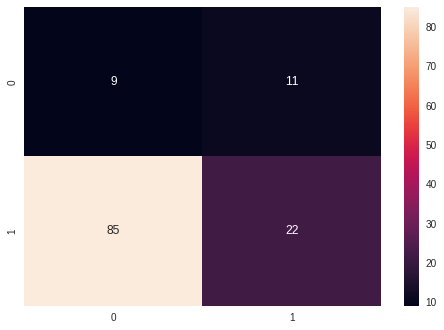

In [122]:
#binary class accuracy for LLNA data
import pandas as pd
from sklearn.metrics import confusion_matrix
# create the confusion matrix
cm=confusion_matrix(merge['EWC_Model1_Call'], merge['LLNACallMNC'], labels=[1,0])
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

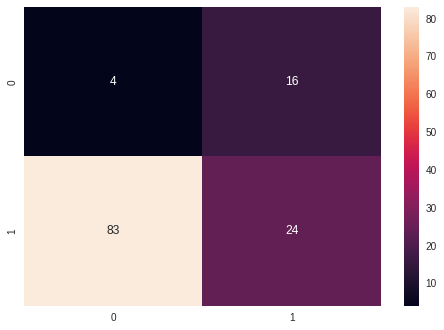

In [83]:

# Binary Class accuracy usisng human data
hm=confusion_matrix(merge['EWC_Model1_Call'], merge['humanCall'], labels=[1,0])
sns.heatmap(hm, annot=True, fmt='d')

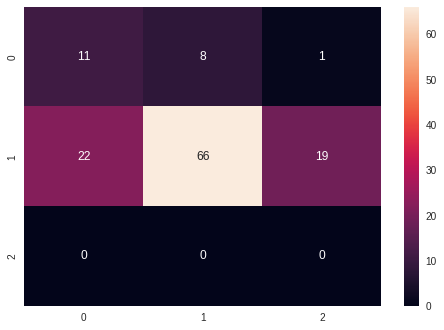

In [84]:
#three class accuracy using LLNA data
# convert the columns to categorical variables with the specified levels
merge['LLNApotency3classMNC'] = pd.Categorical(merge['LLNApotency3classMNC'], categories=["Non", "Weak", "Strong"])
merge['EWC_Model1_Potency_Pred.3class'] = pd.Categorical(merge['EWC_Model1_Potency_Pred.3class'], categories=["Non", "Weak", "Strong"])

# create the confusion matrix
cl_llna3=confusion_matrix(merge['EWC_Model1_Potency_Pred.3class'], merge['LLNApotency3classMNC'], labels=["Non", "Weak", "Strong"])
sns.heatmap(cl_llna3, annot=True, fmt='d')

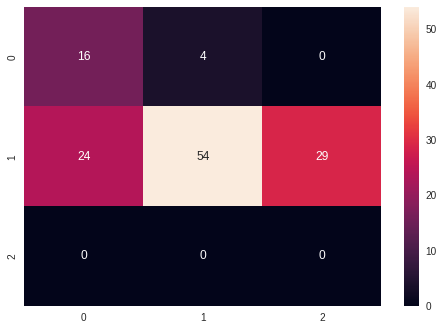

In [85]:
# create the confusion matrix for 3 class potency and human data 
cl_hm3=confusion_matrix(merge['EWC_Model1_Potency_Pred.3class'], merge['humanpotency3class'], labels=["Non", "Weak", "Strong"])
sns.heatmap(cl_hm3, annot=True, fmt='d')

In [99]:
import pickle

In [ ]:
ANN_MODEL1.to_csv('EWC_DPRA_HCLAT.csv')


In [ ]:
data_to_excel=pd.ExcelWriter('New_CosEUdata.xlsx')
CosEu.to_excel(data_to_excel)
data_to_excel.save()

In [ ]:
list(merge.columns)

In [ ]:
# Create a dataframe with ypred and ytest as columns
df = pd.DataFrame({'ypred': ypred, 'ytest': ytest})

# Calculate the cross-tabulation of ypred and ytest
ct = pd.crosstab(df['ypred'], df['ytest'])

#  correlation coefficient
corr = ct.corr().iloc[0,1]

#  covariance
cov = ct.cov().iloc[0,1]

print(f'Correlation coefficient: {corr}')
print(f'Covariance: {cov}')